# Glucose Values Analysis

Data Source: Jeremy's Dexcom Clarity

Time Period: 01-2020 to 04-2021


## Data Cleaning, adding columns and pre-processing

In [68]:
# libraries

import pandas as pd
import numpy as np
import librosa as lr

import datetime

from matplotlib import pyplot as plt

In [69]:
# read data
data = pd.read_csv('data_secret/full_data.csv', index_col='Index')

C:\Users\omkar\AppData\Local\Programs\Python\Python37\lib\site-packages\IPython\core\interactiveshell.py:3166: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [70]:
# add new columns# data cleaning

glucose_col = 'Glucose Value (mg/dL)'

# convert to date time for easy access
data['Date']= pd.to_datetime(data['Date'])
data['Time']= pd.to_datetime(data['Time'])

# year, month, day, hour, minute, second
data['Year'] = pd.DatetimeIndex(data['Date']).year
data['Month'] = pd.DatetimeIndex(data['Date']).month
data['Day'] = pd.DatetimeIndex(data['Date']).day
data['Hour'] = pd.DatetimeIndex(data['Time']).hour
data['Minute'] = pd.DatetimeIndex(data['Time']).minute
data['Second'] = pd.DatetimeIndex(data['Time']).second
data['Weekday'] = pd.DatetimeIndex(data['Date']).weekday

# removing nulls and zeros in glucose
data = data[data[glucose_col].notna()]
data = data[data[glucose_col]!="Low"]
data = data[data[glucose_col]!="High"]
data[glucose_col] = data[glucose_col].astype(int)

data[glucose_col] = data[glucose_col].astype(int)

# remove unnecessary columns
data = data.drop(columns=['Event Type', 'Event Subtype'])

In [71]:

# check all the data types of the columns and check some rows as samples
print(data.dtypes)
data.sample(10)

Timestamp (YYYY-MM-DDThh:mm:ss)            object
Date                               datetime64[ns]
Time                               datetime64[ns]
Glucose Value (mg/dL)                       int32
Duration (hh:mm:ss)                        object
Transmitter Time (Long Integer)           float64
Transmitter ID                             object
Year                                        int64
Month                                       int64
Day                                         int64
Hour                                        int64
Minute                                      int64
Second                                      int64
Weekday                                     int64
dtype: object


,Timestamp (YYYY-MM-DDThh:mm:ss),Date,Time,Glucose Value (mg/dL),Duration (hh:mm:ss),Transmitter Time (Long Integer),Transmitter ID,Year,Month,Day,Hour,Minute,Second,Weekday
Index,,,,,,,,,,,,,,
7594,2020-02-18T13:27:50,2020-02-18,2021-05-11 13:27:50,181,NaN,758173.0,8HJG9N,2020,2,18,13,27,50,1
43634,2020-07-14T04:56:20,2020-07-14,2021-05-11 04:56:20,157,NaN,3488173.0,8GYFXK,2020,7,14,4,56,20,1
32589,2020-05-27T13:15:53,2020-05-27,2021-05-11 13:15:53,217,NaN,9303673.0,8HJG9N,2020,5,27,13,15,53,2
20823,2020-04-13T05:59:31,2020-04-13,2021-05-11 05:59:31,112,NaN,5475973.0,8HJG9N,2020,4,13,5,59,31,0
17489,2020-03-30T18:34:04,2020-03-30,2021-05-11 18:34:04,83,NaN,4311673.0,8HJG9N,2020,3,30,18,34,4,0
49748,2020-08-05T22:22:18,2020-05-08,2021-05-11 22:22:18,288,NaN,5451673.0,8GYFXK,2020,5,8,22,22,18,4
46663,2020-07-25T09:36:48,2020-07-25,2021-05-11 09:36:48,273,NaN,4455373.0,8GYFXK,2020,7,25,9,36,48,5
30875,2020-05-21T12:30:42,2020-05-21,2021-05-11 12:30:42,213,NaN,8782573.0,8HJG9N,2020,5,21,12,30,42,3
41761,2020-07-07T11:00:59,2020-07-07,2021-05-11 11:00:59,150,NaN,2905273.0,8GYFXK,2020,7,7,11,0,59,1


## Graphs - Mean Glucose levels by various (now so meaningful) groupings

[]

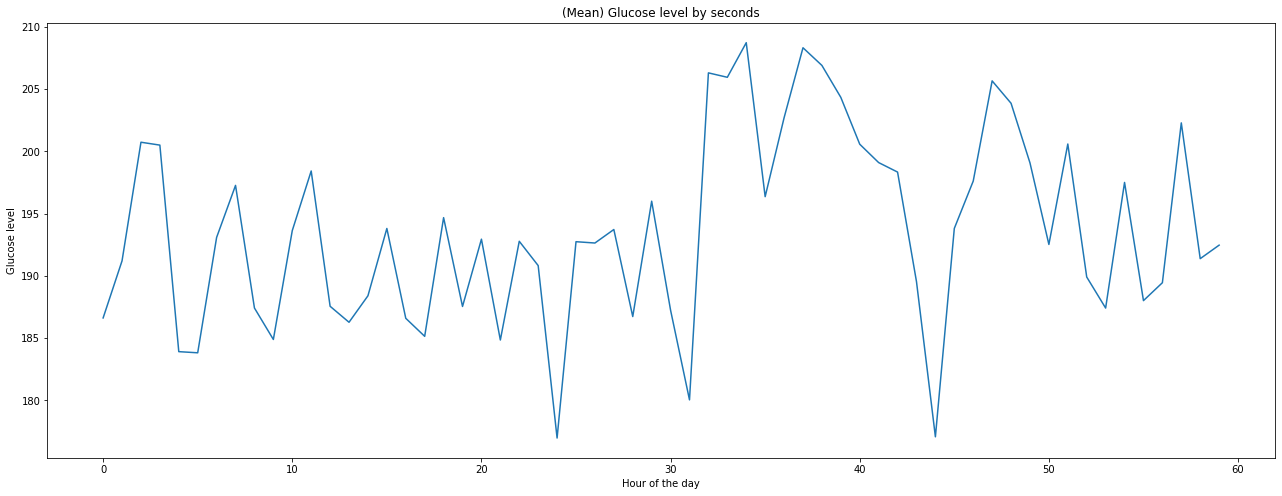

In [72]:
groupby_col = 'Second'
df_hourly = data.groupby(groupby_col).mean().reset_index()
df_hourly[[groupby_col,glucose_col]]

plt.figure(figsize=[22,8])
plt.plot(df_hourly[glucose_col])
plt.title('(Mean) Glucose level by seconds')
plt.xlabel('Hour of the day')
plt.ylabel('Glucose level')
plt.plot()

[]

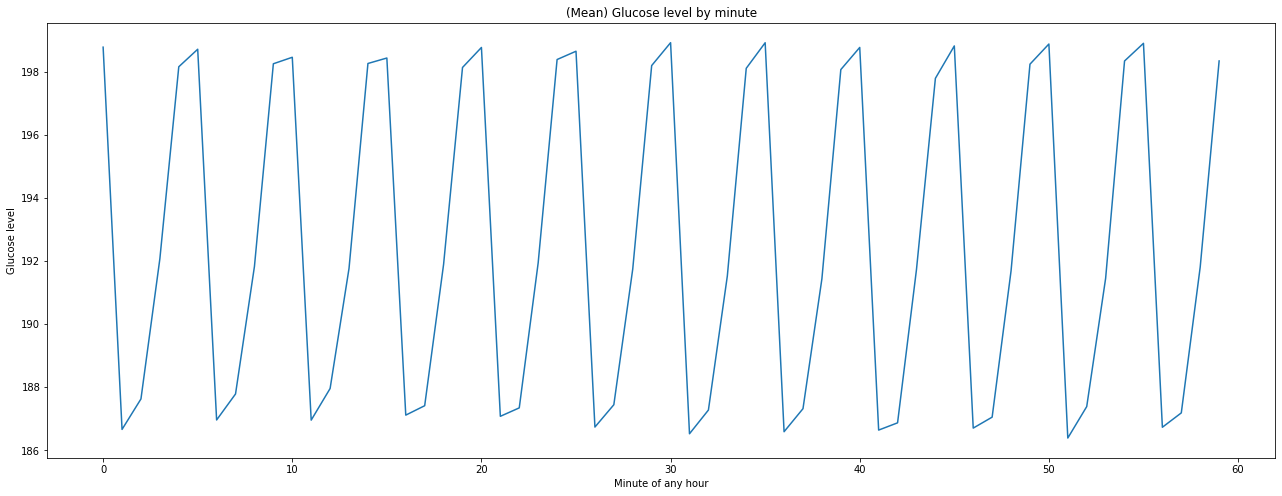

In [73]:
groupby_col = 'Minute'
df_hourly = data.groupby(groupby_col).mean().reset_index()
df_hourly[[groupby_col,glucose_col]]

plt.figure(figsize=[22,8])
plt.plot(df_hourly[glucose_col])
plt.title('(Mean) Glucose level by minute')
plt.xlabel('Minute of any hour')
plt.ylabel('Glucose level')
plt.plot()

[]

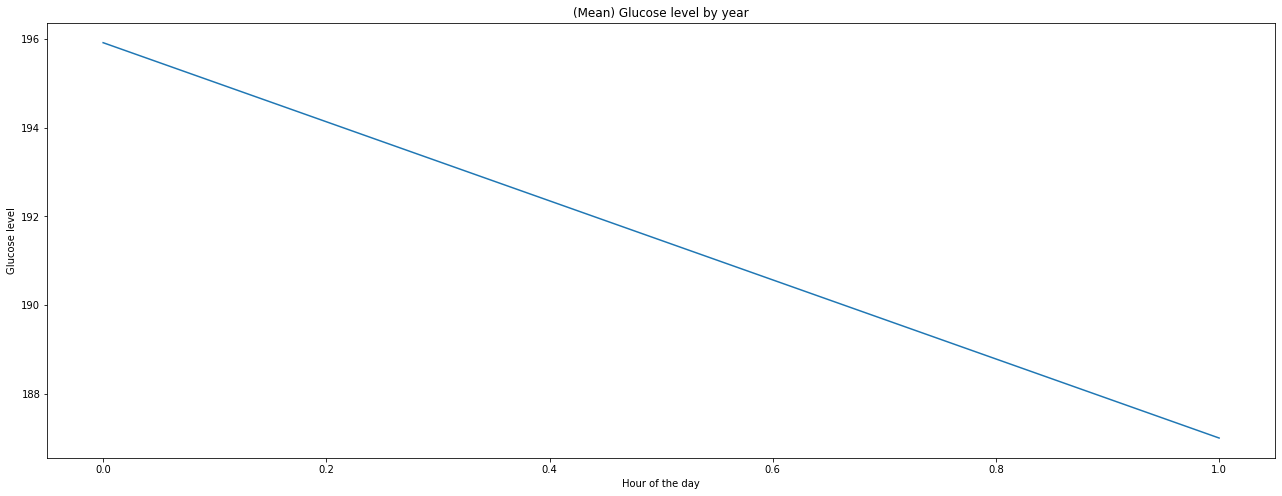

In [74]:
groupby_col = 'Year'
df_hourly = data.groupby(groupby_col).mean().reset_index()
df_hourly[[groupby_col,glucose_col]]

plt.figure(figsize=[22,8])
plt.plot(df_hourly[glucose_col])
plt.title('(Mean) Glucose level by year')
plt.xlabel('Hour of the day')
plt.ylabel('Glucose level')
plt.plot()

## Graphs - Mean Glucose levels by various (meaningful) groupings

[]

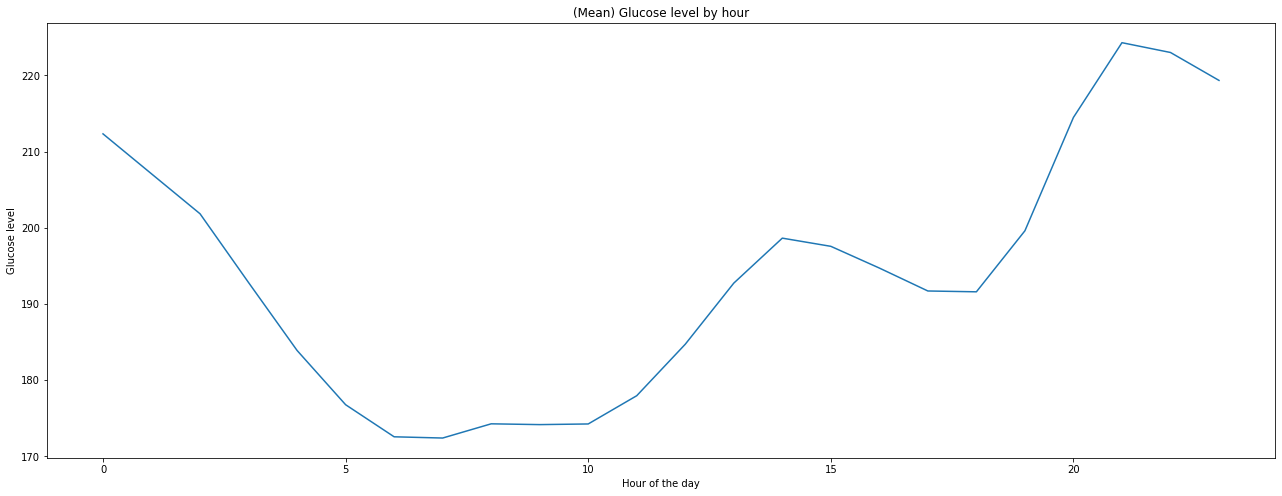

In [75]:
groupby_col = 'Hour'
df_hourly = data.groupby(groupby_col).mean().reset_index()
df_hourly[[groupby_col,glucose_col]]

plt.figure(figsize=[22,8])
plt.plot(df_hourly[glucose_col])
plt.title('(Mean) Glucose level by hour')
plt.xlabel('Hour of the day')
plt.ylabel('Glucose level')
plt.plot()

[]

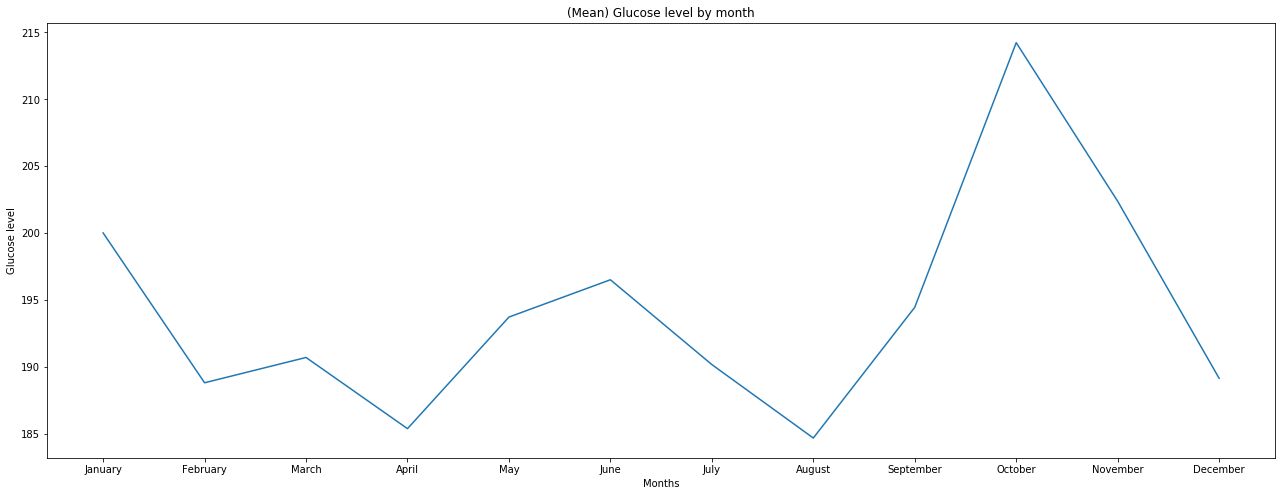

In [76]:
groupby_col = 'Month'
df_hourly = data.groupby(groupby_col).mean().reset_index()
df_hourly[[groupby_col,glucose_col]]

plt.figure(figsize=[22,8])
plt.plot(df_hourly[glucose_col])
plt.title('(Mean) Glucose level by month')
plt.xlabel('Months')
plt.ylabel('Glucose level')
plt.xticks(np.arange(12), [datetime.date(2020, i+1, 1).strftime("%B") for i in range(12)])
plt.plot()

[]

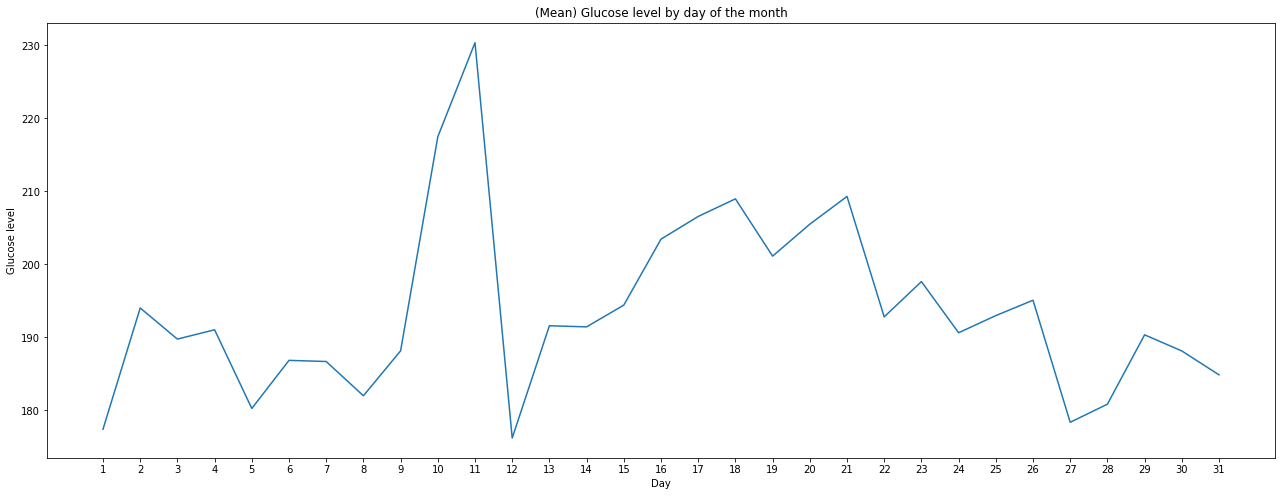

In [77]:
groupby_col = 'Day'
df_hourly = data.groupby(groupby_col).mean().reset_index()
df_hourly[[groupby_col,glucose_col]]

plt.figure(figsize=[22,8])
plt.plot(df_hourly[glucose_col])
plt.title('(Mean) Glucose level by day of the month')
plt.xlabel('Day')
plt.ylabel('Glucose level')
plt.xticks(np.arange(31), np.arange(1,32))
plt.plot()

[]

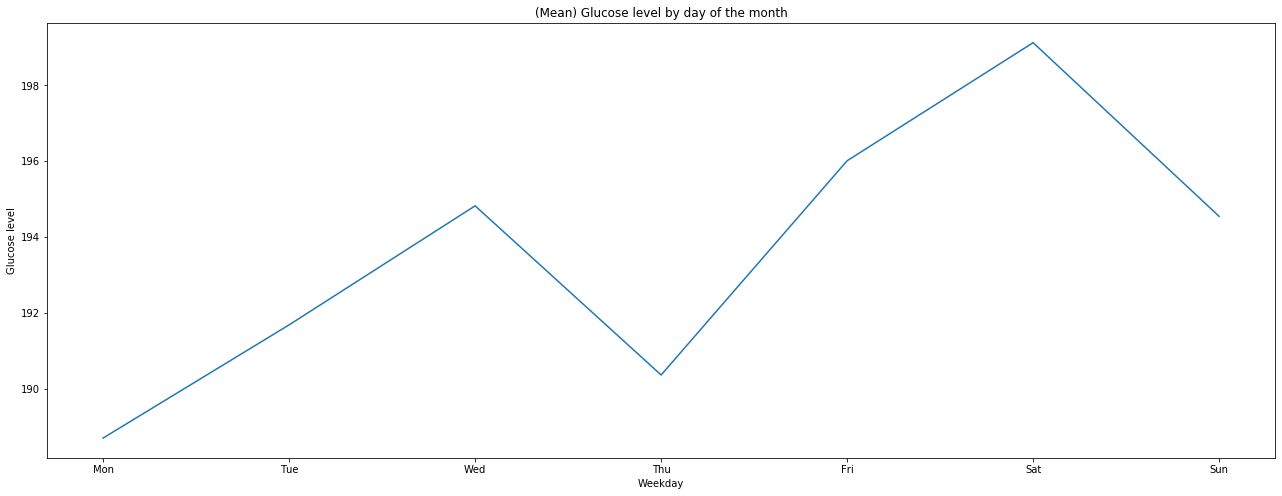

In [78]:
groupby_col = 'Weekday'
df_hourly = data.groupby(groupby_col).mean().reset_index()
df_hourly[[groupby_col,glucose_col]]

plt.figure(figsize=[22,8])
plt.plot(df_hourly[glucose_col])
plt.title('(Mean) Glucose level by day of the month')
plt.xlabel('Weekday')
plt.ylabel('Glucose level')
plt.xticks([0,1,2,3,4,5,6], ['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
plt.plot()

## Overlap Analysis of Weekday and Hour of a specific time period

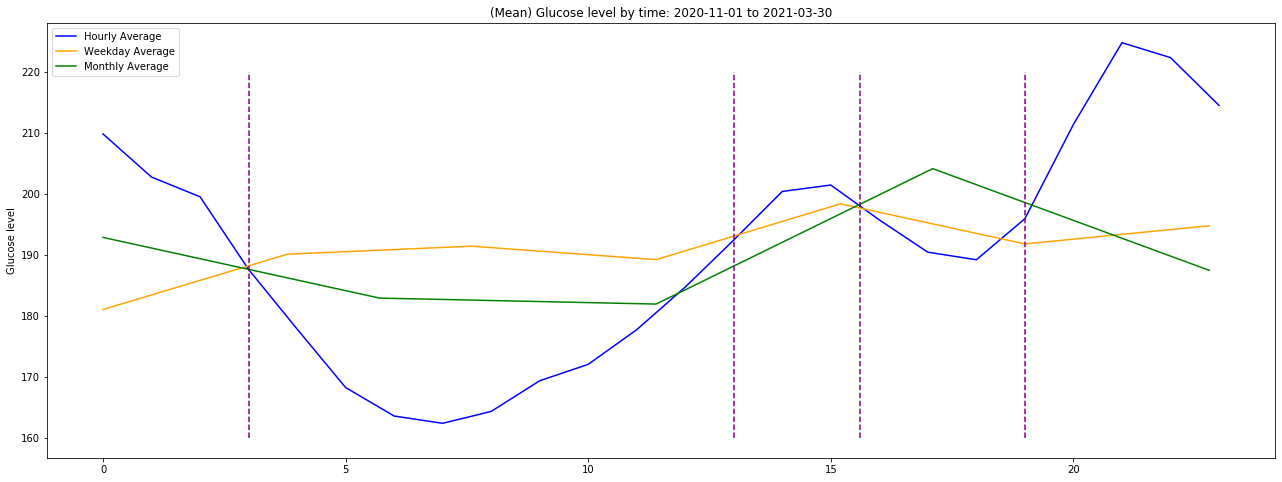

In [79]:
start_date = '2020-11-01'
end_date = '2021-03-30'

df = data[(data['Date'] >= start_date) & (data['Date'] <= end_date)]

groupby_col = 'Hour'
df_hourly = df.groupby(groupby_col).mean().reset_index()[[groupby_col,glucose_col]]

groupby_col = 'Weekday'
df_weekly = df.groupby(groupby_col).mean().reset_index()[[groupby_col,glucose_col]]

groupby_col = 'Month'
df_monthly = df.groupby(groupby_col).mean().reset_index()[[groupby_col,glucose_col]]

plt.figure(figsize=[22,8])
plt.plot(np.arange(24),df_hourly[glucose_col].values, color='blue', label='Hourly Average')
plt.plot(np.arange(7)*3.8,df_weekly[glucose_col].values, color='orange', label='Weekday Average')
plt.plot(np.arange(5)*5.7,df_monthly[glucose_col].values, color='green', label='Monthly Average')
plt.plot([3,3],[160,220], '--', color='purple')
plt.plot([13,13],[160,220], '--', color='purple')
plt.plot([15.6,15.6],[160,220], '--', color='purple')
plt.plot([19,19],[160,220], '--', color='purple')
plt.title('(Mean) Glucose level by time: ' + start_date + ' to ' + end_date)
plt.ylabel('Glucose level')
plt.legend()
plt.plot()

plt.savefig('scores/example_score.png')

## Sonify the Data to be sent to PureData


In [80]:
cycles = 56

In [81]:
def normalize_values_withCycle(df, count):
        
    step = cycles/(count-1)

    X = [0 for i in range(count)]
    y = [0 for i in range(count)]
        
    min_val = df[glucose_col].min()
    max_val = df[glucose_col].max()
    
    for i in range(count):
        X[i] = (i)*step
        y[i] = (df[glucose_col].values[i] - min_val)/(max_val - min_val)

    return np.array(X,), np.array(y)

In [102]:
import numpy as np
from sklearn.linear_model import LinearRegression
from scipy import interpolate

# make a dataframe
att_cols = 3
cols = ['high_pitch_val']
data_cycles = pd.DataFrame([[0 for i in range(len(cols))] for i in range(cycles)], columns=cols)

# High pitched drums
X, y = normalize_values_withCycle(df_hourly, 24)
f_hourly = interpolate.interp1d(X, y)
data_cycles['low_pitch_val'] = f_hourly(data_cycles.index)
f = interpolate.interp1d([0,1], [5,13])
data_cycles['low_pitch_val_ts12'] = f(data_cycles['low_pitch_val']).astype(int)
f = interpolate.interp1d([0,1], [5,17])
data_cycles['low_pitch_val_ts16'] = f(data_cycles['low_pitch_val']).astype(int)

# Low pitched drums
X, y = normalize_values_withCycle(df_monthly, 5)
f_monthly = interpolate.interp1d(X, y)
data_cycles['high_pitch_val'] = f_monthly(data_cycles.index)
f = interpolate.interp1d([0,1], [4,13])
data_cycles['high_pitch_val_ts12'] = f(data_cycles['high_pitch_val']).astype(int)
f = interpolate.interp1d([0,1], [4,17])
data_cycles['high_pitch_val_ts16'] = f(data_cycles['high_pitch_val']).astype(int)

# Synth or some other value
X, y = normalize_values_withCycle(df_weekly, 7)
f_weekly = interpolate.interp1d(X, y)
data_cycles['synth_val'] = f_weekly(data_cycles.index)
f = interpolate.interp1d([0,1], [1,8])
data_cycles['synth_val_ts'] = f(data_cycles['synth_val']).astype(int)



data_cycles.to_csv('data\osc_data.csv')



## Visualizing the Score normalized and time signatures

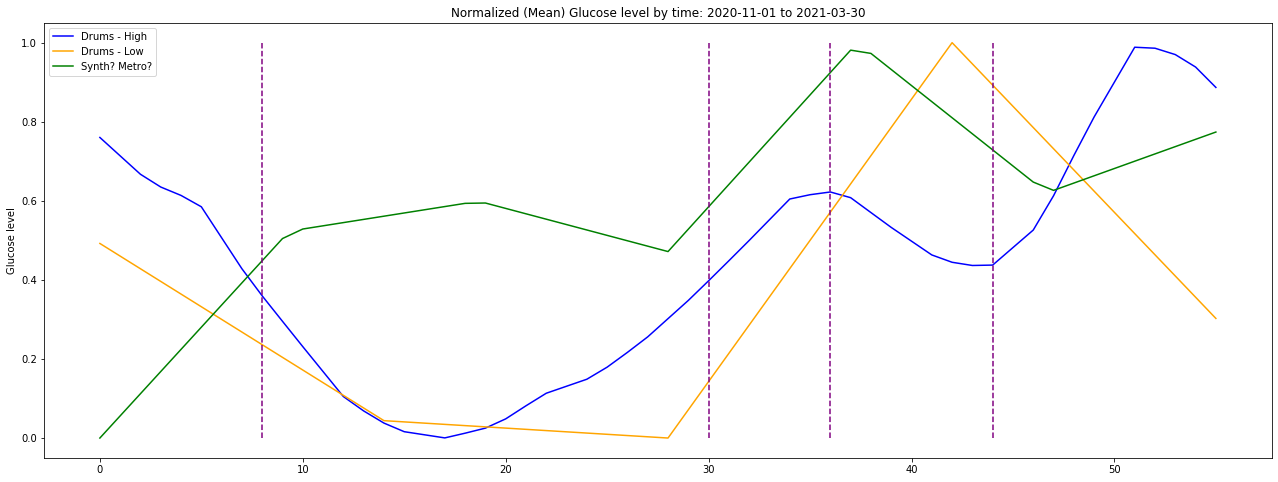

In [103]:
plt.figure(figsize=[22,8])
plt.plot(data_cycles['low_pitch_val'].values, color='blue', label='Drums - High')
plt.plot(data_cycles['high_pitch_val'].values, color='orange', label='Drums - Low')
plt.plot(data_cycles['synth_val'].values, color='green', label='Synth? Metro?')
plt.plot([8,8],[0,1], '--', color='purple')
plt.plot([30,30],[0,1], '--', color='purple')
plt.plot([36,36],[0,1], '--', color='purple')
plt.plot([44,44],[0,1], '--', color='purple')
plt.title('Normalized (Mean) Glucose level by time: ' + start_date + ' to ' + end_date)
plt.ylabel('Glucose level')
plt.legend()
plt.plot()
plt.savefig('scores/example_plot_normalized.png')

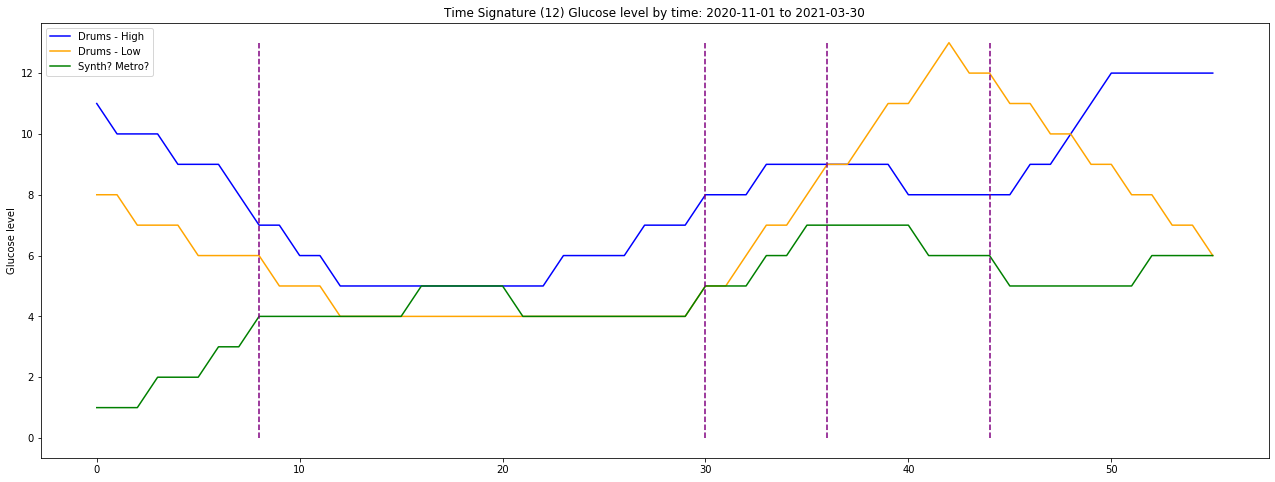

In [104]:
plt.figure(figsize=[22,8])
plt.plot(data_cycles['low_pitch_val_ts12'].values, color='blue', label='Drums - High')
plt.plot(data_cycles['high_pitch_val_ts12'].values, color='orange', label='Drums - Low')
plt.plot(data_cycles['synth_val_ts'].values, color='green', label='Synth? Metro?')
plt.plot([8,8],[0,13], '--', color='purple')
plt.plot([30,30],[0,13], '--', color='purple')
plt.plot([36,36],[0,13], '--', color='purple')
plt.plot([44,44],[0,13], '--', color='purple')
plt.title('Time Signature (12) Glucose level by time: ' + start_date + ' to ' + end_date)
plt.ylabel('Glucose level')
plt.legend()
plt.plot()
plt.savefig('scores/example_plot_timesignatures12.png')

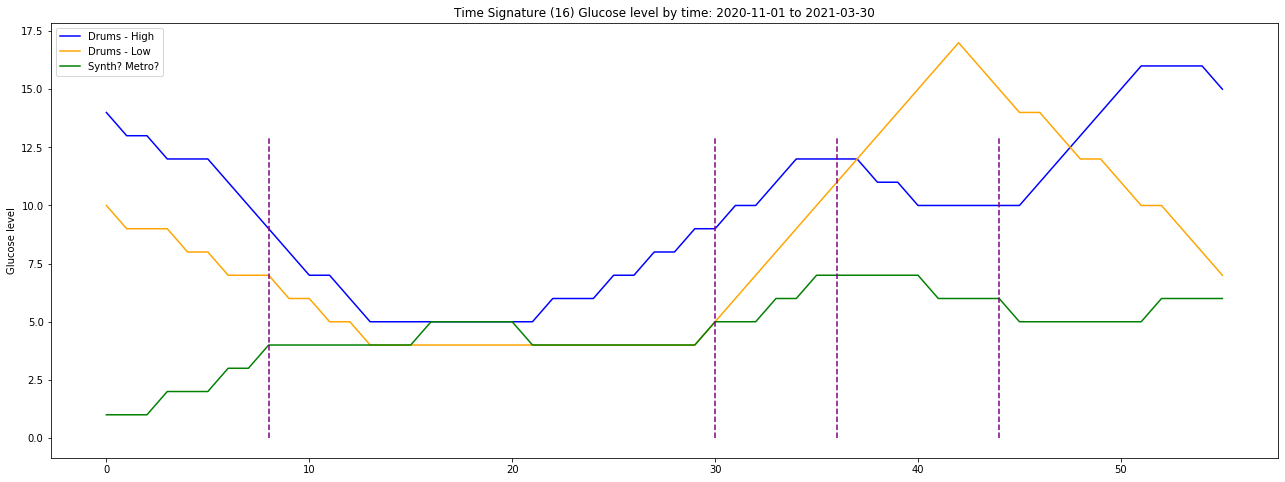

In [105]:
plt.figure(figsize=[22,8])
plt.plot(data_cycles['low_pitch_val_ts16'].values, color='blue', label='Drums - High')
plt.plot(data_cycles['high_pitch_val_ts16'].values, color='orange', label='Drums - Low')
plt.plot(data_cycles['synth_val_ts'].values, color='green', label='Synth? Metro?')
plt.plot([8,8],[0,13], '--', color='purple')
plt.plot([30,30],[0,13], '--', color='purple')
plt.plot([36,36],[0,13], '--', color='purple')
plt.plot([44,44],[0,13], '--', color='purple')
plt.title('Time Signature (16) Glucose level by time: ' + start_date + ' to ' + end_date)
plt.ylabel('Glucose level')
plt.legend()
plt.plot()
plt.savefig('scores/example_plot_timesignatures16.png')